# ### Python Hackathon by Data Ninjas team #####

In [2]:
#Importing needed libraries/Modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re # For regular expression
!pip install pandasql
from datetime import datetime as dt
import pandasql as ps
import math

  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26818 sha256=7c4add0edd42b42fbb4157dce65020ecf1df2d049b83bc2189fe1dbe3515961e
  Stored in directory: c:\users\sowmy\appdata\local\pip\cache\wheels\ed\8f\46\a383923333728744f01ba24adbd8e364f2cb9470a8b8e5b9ff
Successfully built pandasql


In [3]:
#Defining all dataframes
dfpa = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "Patients")
dfedv = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "EDVisits")
dfav = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "AmbulatoryVisits")
dfreadm = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "ReAdmissionRegistry")
dfdis = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "Discharges")
dfpr = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "Providers")
dfedu = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "EDUnique")

# 1.Make a pair plot on Readmission Registry table & do u see any correlation between columns values¶

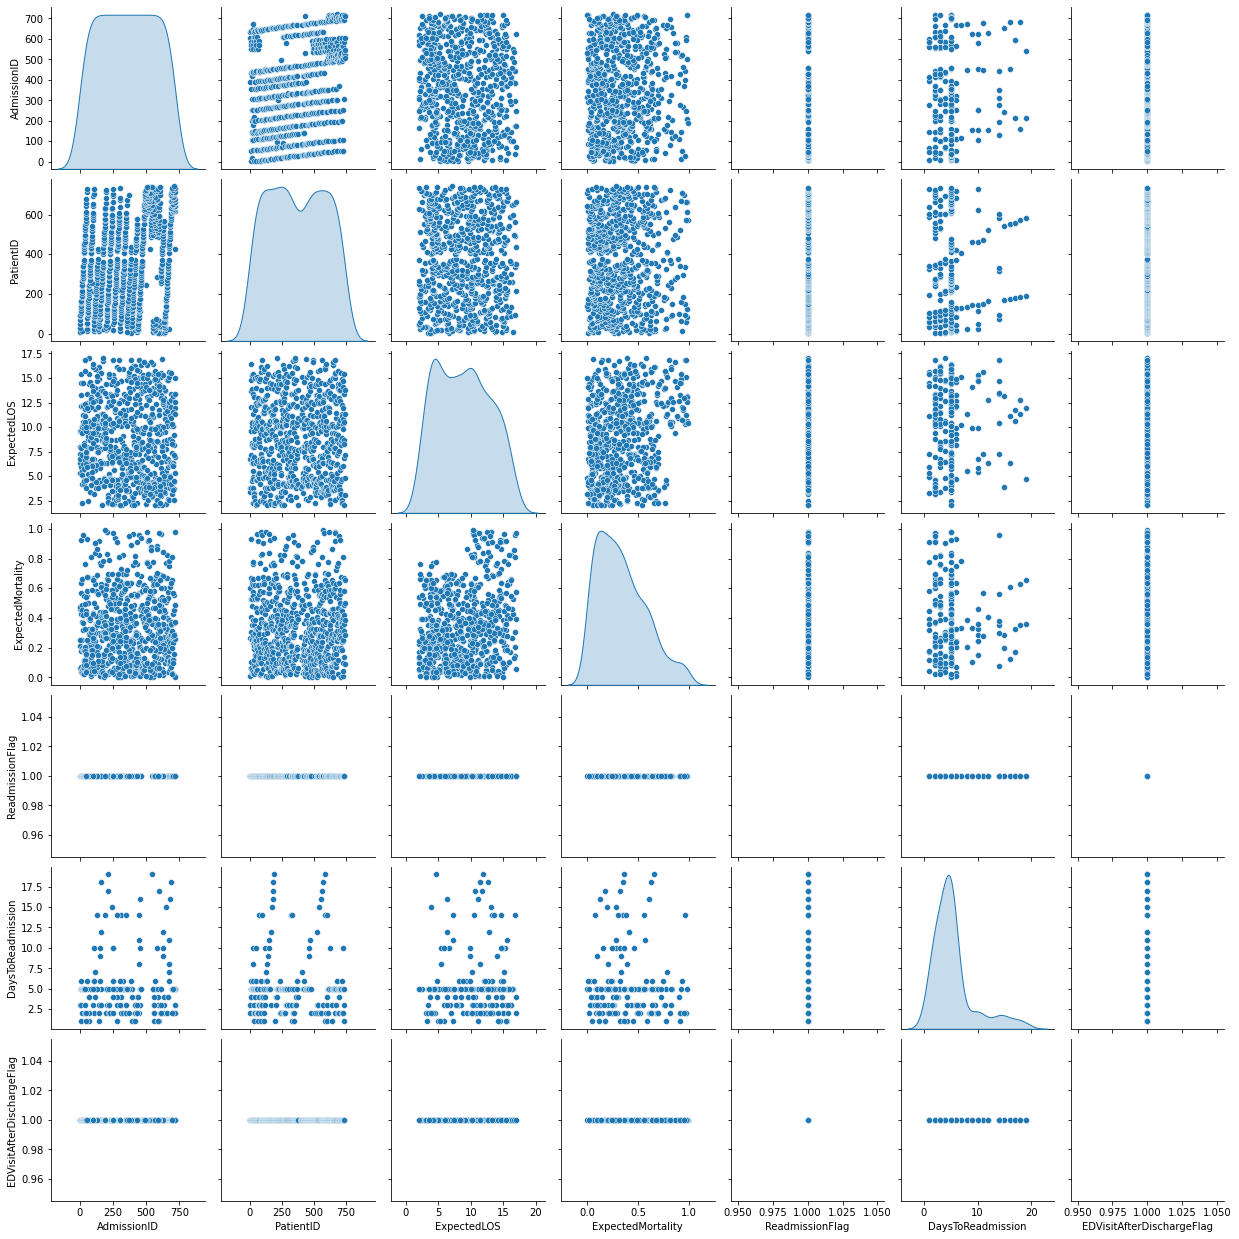

In [7]:
#we Dont see any significant co-relation between any two columns of this table
sns.pairplot(dfreadm, diag_kind = 'kde') 

# 2. Using iloc, retrieve the firstname and lastname of patients between indices 101 and 200

In [8]:
fname=dfpa.FirstName.iloc[101:201]
lname=dfpa.LastName.iloc[101:201]
for x in range(101,201):
    print("%d  %s  %s" %(x,fname[x],lname[x]))

101  Gipsy  Frankton
102  Jethro  Wharin
103  Viv  Aylward
104  Swift  Dreschler
105  Fadel  Jacquemard
106  Myrtia  Pow
107  Damian  Anthill
108  Christiano  Bonhan
109  Jewel  Philipsson
110  Devlin  Stonehewer
111  Kellen  Bonhan
112  Shaine  MacLeod
113  Swift  Breagan
114  Zonnya  Frankton
115  Gerhold  Inc
116  Blondie  Inc
117  Kristofer  Scupham
118  Tann  Murcutt
119  Shaine  Tuson
120  Granny  Prandoni
121  Hilll  Nock
122  Pollyanna  Mochan
123  Lucila  McGrann
124  Mia  Inc
125  Zonnya  Machon
126  Blondie  Inc
127  Fadel  Maseres
128  Gerhold  Kneath
129  Lanni  Angear
130  Richy  McGrann
131  Christiano  Matevosian
132  Cally  Group
133  Borer  Stonehewer
134  Cally  Aylward
135  Gabriel  Walkden
136  Shaine  Machon
137  Damian  Maseres
138  Richy  Inc
139  Cilka  Inc
140  Daugherty  D'Ambrogi
141  Rourke  Mateiko
142  Damian  Tuson
143  Erik  Roughley
144  Sheena  LLC
145  Borer  Roughley
146  Borer  Polini
147  Sheena  McGrann
148  Daugherty  Murcutt
149  Erik  Mateiko


# 3. Create a figure object called fig using plt.figure() **
#** Use add_axes to add an axis to the figure canvas at [0,0,1,1]. Call this new axis ax. **
#** Plot (x,y) on that axes and set the labels and titles to match the plot below:**

Text(0.5, 1.0, 'Fig Object')

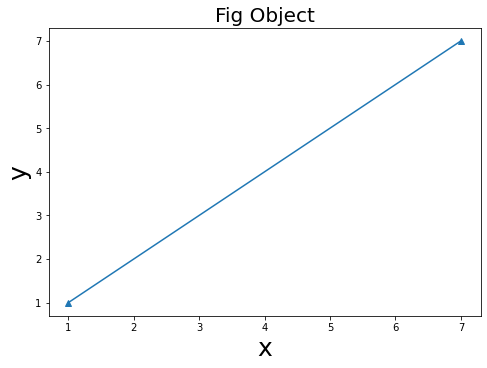

In [4]:
x=np.arange(1,10,6)
y=np.arange(1,10,6)

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(x,y,marker='^')
ax.set_xlabel('x',fontsize=25)
ax.set_ylabel('y',fontsize=25)
ax.set_title('Fig Object',fontsize=20)

# 4. Display Data By splitting age in 4 quartiles and labeling the quartiles
Step 1: Calculate Age as of date, using date of borth in Patients table
Step 2: Calculate Quartile based on the newly created Age column

In [4]:
import datetime as dt
dfpa['Age']=(dt.datetime.today()\
            -pd.to_datetime(dfpa['DateOfBirth'])).astype('timedelta64[Y]')
dfpa["AgeQuartile"] = pd.qcut(dfpa["Age"], q=[0, .25, .5,.75, 1],labels=['Q1', 'Q2', 'Q3','Q4'])

dfpa

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age,AgeQuartile
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,62.0,Q4
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,36.0,Q1
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,46.0,Q2
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,53.0,Q3
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,60.0,Q4
...,...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English,35.0,Q1
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English,51.0,Q3
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English,39.0,Q1
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English,58.0,Q4


# 5. Display full name of patients who are born in 1986

In [4]:
dfpa['year']=pd.DatetimeIndex(dfpa['DateOfBirth']).year
dfpa['FullName']=dfpa['FirstName']+' '+dfpa['LastName']
dfpa.loc[dfpa['year']==1986,['FullName','year']].reset_index(drop=True)

,FullName,year
0,Gabriel Joseph,1986
1,Lincoln Brenda,1986
2,Ala Halpert,1986
3,Lolita Darci,1986
4,Fadel Bernardt,1986
5,Bentley Kippax,1986
6,Vale Olanda,1986
7,Britt Dureden,1986
8,Cristabel Chatel,1986
9,Constantia Group,1986


# 6. Create a jointplot on expected mortality & expected length of stay

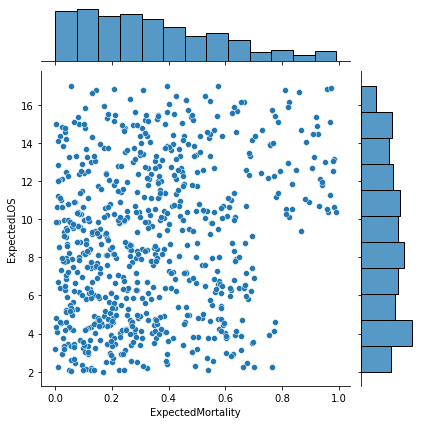

In [4]:
import seaborn as sns
sns.jointplot(x = "ExpectedMortality", y = "ExpectedLOS",
              kind = "scatter", data = dfreadm)

# 7. Create a pair plot by taking parameter "hue" as EDDisposition

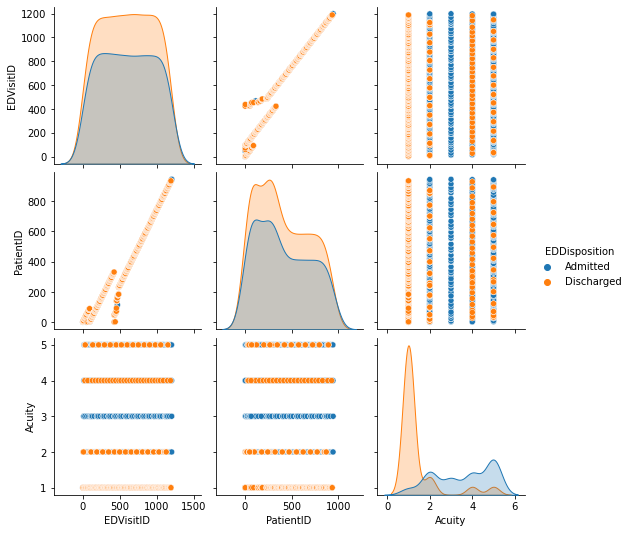

In [5]:
sns.pairplot(dfedv, hue ='EDDisposition')
plt.show()

# 8. Create a bar chart between expectedLOS & Primary diagnosis

<function matplotlib.pyplot.show(close=None, block=None)>

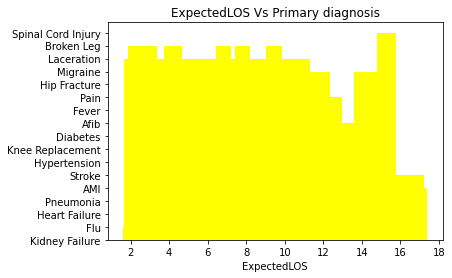

In [5]:
plt.bar(dfreadm.ExpectedLOS,dfreadm.PrimaryDiagnosis,color='yellow' )
plt.xlabel('ExpectedLOS')
plt.title('ExpectedLOS Vs Primary diagnosis')
plt.show


# 9. Get the list of patient ids which are not there in ReadmissionRegistry

In [6]:
df_patientid = dfpa['PatientID'][~dfpa['PatientID'].isin(dfreadm['PatientID'].drop_duplicates())].reset_index(drop=True)
df_patientid

0        4
1      135
2      145
3      189
4      200
      ... 
236    941
237    942
238    943
239    944
240    945
Name: PatientID, Length: 241, dtype: int64

# 10. Create a boxplot on ExpectedLOS by taking service into account

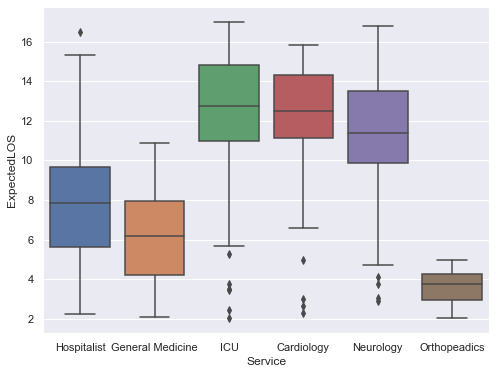

In [9]:
Boxplt=sns.boxplot(x="Service",y="ExpectedLOS",data=dfreadm)
#sns.set(rc={"figure.figsize":(8,6)})

# 11. Create a pie chart by taking Service= ["Icu", "Neurology", "General", "Medicine"] & EcpectedLOS=[10,5,7,9] &explode the wedge with highest LOS

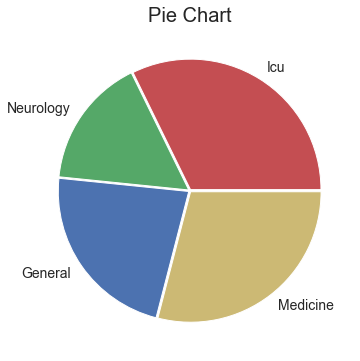

In [35]:
Service= ["Icu", "Neurology", "General", "Medicine"]
ExpectedLOS=[10,5,7,9]
outside=(0,0.5,0.3)
plt.pie(ExpectedLOS,labels=Service, colors=['r','g','b','y'],explode=(0.01,0.01,0.01,0.01),textprops={'fontsize': 14})
plt.title('Pie Chart',fontsize=20)
plt.show()

# 12. Connect to sql and Write a query to get list of Provider names whose Providername is starting with letter T

In [6]:
output_df  = ps.sqldf("""select ProviderName from dfpr where ProviderName like 'T%'""")
output_df

,ProviderName
0,Ted Texas
1,Ted Green
2,Ted Black
3,Tyler Conner
4,Tony Creed
5,Trent Tye


# 13. Create a subplot with 2 rows & 2 columns with object oriented approach.

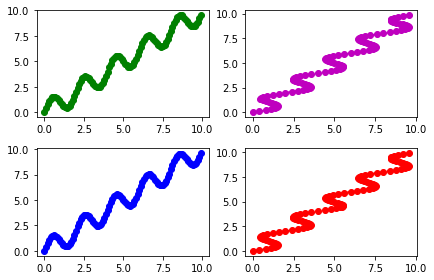

In [7]:
x = np.arange(0, 10, 0.1) 
y = np.sin(math.pi * x) + x

# creating the canvas with class 'fig'
# and it's object 'axes' with '2' row and '2' columns
fig, axes = plt.subplots(2, 2)
  
# plotting graph for 1st element
axes[0, 0].plot(x, y, 'g--o')
  
# plotting graph for 2nd element
axes[0, 1].plot(y, x, 'm--o')
  
# plotting graph for 3rd element
axes[1, 0].plot(x, y, 'b--o')
  
# plotting graph for 4th element
axes[1, 1].plot(y, x, 'r--o')
# Gives a clean look to the graphs
fig.tight_layout()

# 14. Find the number of null values in BloodPressureSystolic column


In [10]:
dfav.BloodPressureSystolic.isnull().sum()

124

# 15. Replace all the null values in ReadmissionFlag with 0

In [6]:
dfreadm['ReadmissionFlag'] = dfreadm['ReadmissionFlag'].fillna(0)
dfreadm.head()

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,0.0,NaN,NaN
1,635,2,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0
2,606,3,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0
4,640,6,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,0.0,NaN,NaN


# 16. Plot a graph to show the distribution of expected length of stay

<AxesSubplot:xlabel='ExpectedLOS', ylabel='Count'>

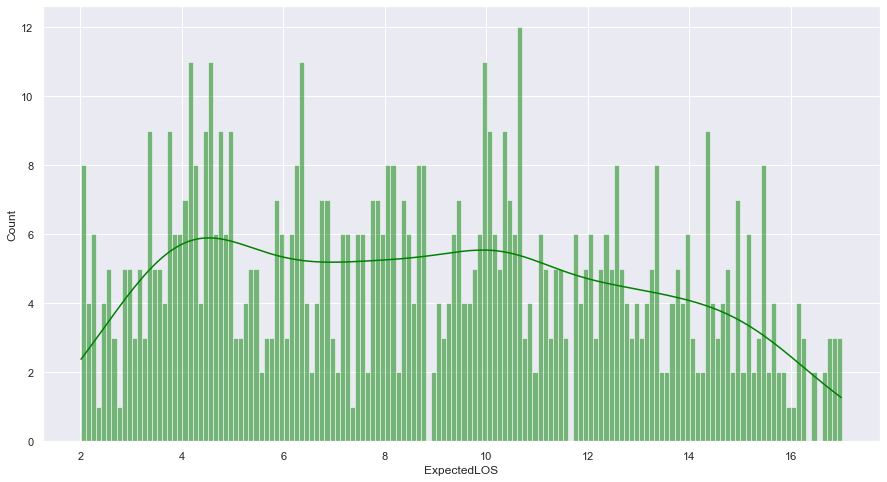

In [8]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.histplot(data =dfreadm , x = 'ExpectedLOS',bins= 60 ,binwidth = 0.1, kde = True,color = 'green')


# 17. Create a heat map to show the correlation between the column values of Edvisits

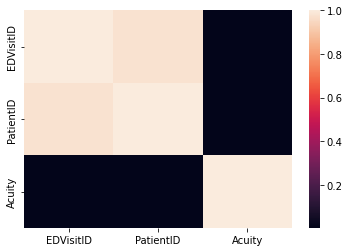

In [7]:
sns.heatmap(dfedv.corr());

# 18. Add column 'Age' in Patient table

In [8]:
dfpa['Age']=(dt.datetime.today()\
            -pd.to_datetime(dfpa['DateOfBirth'])).astype('timedelta64[Y]')
dfpa.head()

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age,AgeQuartile
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,62.0,Q4
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,36.0,Q1
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,46.0,Q2
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,53.0,Q3
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,60.0,Q4


# 19. Create a dataframe with date and time as columns, where the values are the discharge time from readmissionregistry sheet

In [12]:
Date = pd.to_datetime(dfreadm['DischargeDate']).dt.date
Time = pd.to_datetime(dfreadm['DischargeDate']).dt.time
df_New = pd.DataFrame(list(zip(Date,Time)),
                  columns = ['Date', 'Time'])
df_New

,Date,Time
0,2018-01-04,19:59:31.391000
1,2018-01-04,21:28:51.898000
2,2018-01-04,22:28:23.672000
3,2018-01-05,05:47:04.933000
4,2018-01-05,14:18:30.029000
...,...,...
715,2018-03-07,21:22:10.061000
716,2018-03-08,02:43:18.749000
717,2018-03-08,09:27:18.377000
718,2018-03-10,06:06:12.068000


# 20. Count of number of patients admitted based on Primary Diagnosis and Service provided


In [9]:
# Assumptions :: "no. of Patients admitted " in the context of this question is being assumed to be that the count of patient in readmission registry 
dfreadm.groupby(['PrimaryDiagnosis','Service'])[['PatientID']].count()

PatientID
PrimaryDiagnosis   Service                    
AMI                Cardiology               40
                   Hospitalist               1
                   ICU                       5
                   Neurology                 2
Afib               Cardiology               10
                   ICU                       1
Broken Leg         Cardiology                3
                   General Medicine          3
                   Hospitalist               3
Diabetes           General Medicine         38
                   Hospitalist              26
Fever              General Medicine         13
                   Hospitalist               3
                   ICU                       3
Flu                Cardiology                2
                   General Medicine         54
                   Hospitalist              19
                   ICU                       3
                   Neurology                 2
Heart Failure      Cardiology               39
                   ICU                      33
                   Neurology                 6
Hip Fracture       Orthopeadics             23
Hypertension       General Medicine         35
                   Hospitalist               6
                   ICU                       4
                   Neurology                 5
Kidney Failure     Cardiology                1
                   General Medicine         12
                   Hospitalist               6
                   ICU                       1
Knee Replacement   Hospitalist               1
                   Orthopeadics             22
Laceration         General Medicine         21
                   Hospitalist               7
                   ICU                       1
Migraine           Neurology                12
Pain               Neurology                 7
Pneumonia          General Medicine         67
                   Hospitalist              28
                   ICU                      77
                   Neurology                 5
Spinal Cord Injury ICU                       2
Stroke             General Medicine         20
                   Hospitalist               1
                   ICU                      21
                   Neurology                26

# 21. Which demographic patients are prone to get stroke

In [41]:
df=dfreadm.merge(dfpa,how='inner',on='PatientID')
df_stroke=df[df['PrimaryDiagnosis']=='Stroke']
df_stroke.groupby(['Race','Gender','Language'])[['PatientID']].count().idxmax()

PatientID    (Black/African-American, Male, English)
dtype: object

# 22. Create a dataframe with acuity and EDDisposition as the indices and the count of number of patients as the value
Step 1: assign  the grouped counts array to a variable
Step 2: Convert the array into a dataframe
Step 3: Print the info and the dataframe to see if the result is as expected (Multiindex and grouped counts)

In [21]:
df = dfedv.groupby(['Acuity','EDDisposition'])[['PatientID']].count()
df= pd.DataFrame(df, columns=['PatientID'])

df.info()
df

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 9 entries, (1, 'Admitted') to (5, 'Discharged')
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   PatientID  9 non-null      int64
dtypes: int64(1)
memory usage: 263.0+ bytes


PatientID
Acuity EDDisposition           
1      Admitted              32
       Discharged           558
2      Admitted             116
       Discharged            66
3      Admitted              81
4      Admitted             107
       Discharged            30
5      Admitted             179
       Discharged            30

# 23. Function to find the center element in the list. (1 element in odd length list, 2 elements in even length list)

In [12]:
my_list = [5.3, 2, 4, 3, 1,6]
my_list.sort()
def findmiddle(my_list):
    l = len(my_list)
    mid_vlu = (l-1)//2
    if(l % 2 == 0):
        return (my_list[mid_vlu] , my_list[mid_vlu+1])
    else:
        return my_list[mid_vlu]
print('My list :',my_list )
print('Center Element :', findmiddle(my_list))

My list : [1, 2, 3, 4, 5.3, 6]
Center Element : (3, 4)


# 24. Get the count of number of patients based on ReasonForVisit and EDDisposition. Use stack/unstack functions

In [38]:
df=dfedv.groupby(['ReasonForVisit','EDDisposition'])[['PatientID']].count()
df_stacked = df.unstack()
print(df_stacked)

                    PatientID           
EDDisposition        Admitted Discharged
ReasonForVisit                          
Accident                 39.0        NaN
Bleeding                 16.0       15.0
Car Accident             17.0        NaN
Chest Pain               94.0       15.0
Cough                     NaN        1.0
Fever                    46.0      188.0
Gun Shot                 16.0        NaN
Intoxication              NaN       30.0
Laceration                NaN       30.0
Migraine                 47.0      109.0
Pneumonia               136.0       65.0
Shortness of Breath      72.0       77.0
Stomach Ache             32.0      154.0


# 25. Plot a graph by counting the no. of patients in each department


<AxesSubplot:title={'center':'Patients per Department'}, xlabel='VisitDepartmentID', ylabel='Count of patients'>

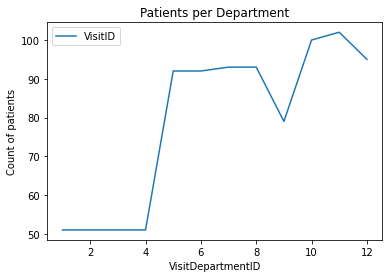

In [8]:
dfav.groupby(['VisitDepartmentID'])[['VisitID']].count().plot(kind='line',ylabel='Count of patients',title="Patients per Department")

# 26. Using Arrays and Loops, find the count of of patients based on gender

In [10]:
count_gf = 0
count_gm = 0

for i, row in dfpa.iterrows():  #i: dataframe index; row: each row in series format
    if row['Gender']=="Male":
          count_gm = count_gm+1
    elif row['Gender']=="Female":
          count_gf = count_gf+1

print("Male :: ",count_gm) 
print("Female  ::  ",count_gf)
    

Male ::  537
Female  ::   408


# 27. Plot a graph to count the patients based on discharge disposition

<AxesSubplot:title={'center':'Discharge Disposition'}, xlabel='DischargeDisposition', ylabel='Count of Patients'>

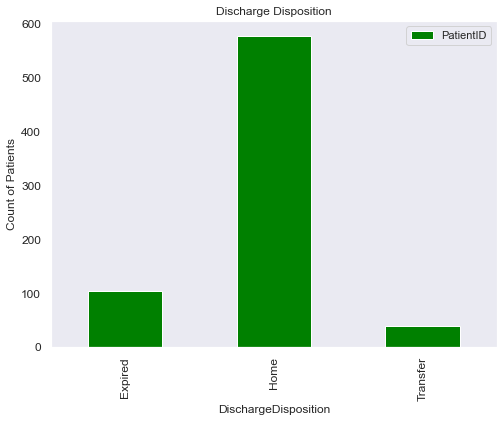

In [44]:
df=dfdis.groupby(['DischargeDisposition'])[['PatientID']].count()
df.plot(kind='bar',title='Discharge Disposition',ylabel='Count of Patients',color={'green'},fontsize=12,grid=False)

# 28. Which reason of visit has maximum mortality rate

In [9]:
#1. First joined two tables
#2. then found mortality rate for all "ReasonforVisit"
#3. Then found "reasonforvisit" with maxinum Mortality Rate
dfedv_dfdis = pd.merge(dfedv,dfdis,
    how="inner", on="PatientID",sort=True )
dfedv_dfdis

dfmortality = pd.DataFrame()
rfv_list = dfedv_dfdis['ReasonForVisit'].unique().tolist()
for i in rfv_list :
    total_rfv_count = dfedv_dfdis[(dfedv_dfdis['ReasonForVisit']==i)]["AdmissionID"].count()
    expired_rfv_count = dfedv_dfdis[(dfedv_dfdis['ReasonForVisit']==i) & (dfedv_dfdis['DischargeDisposition']=='Expired') ]["AdmissionID"].count()
    dfmortality = dfmortality.append({'ReasonForVisit' : i, 'RFVExpiredCount' : expired_rfv_count, 'RFVTotalCount' : total_rfv_count}, 
                ignore_index = True)
    
dfmortality["MortalityRate"] = (dfmortality["RFVExpiredCount"]/dfmortality["RFVTotalCount"]) * 100
dfmortality.nlargest(1,'MortalityRate')


,ReasonForVisit,RFVExpiredCount,RFVTotalCount,MortalityRate
8,Car Accident,3.0,14.0,21.428571


# 29. Calculate average LOS

In [42]:
dfreadm['DischargeDate_abs'] = dfreadm['DischargeDate'].dt.date
dfreadm['AdmissionDate_abs'] = dfreadm['AdmissionDate'].dt.date
dfreadm['LOS']= abs(dfreadm['DischargeDate_abs'] - dfreadm['AdmissionDate_abs'])
dfreadm[['LOS']].mean()

LOS   9 days 12:50:00
dtype: timedelta64[ns]

# 30. Which patientid has most entries in readmission registry

In [19]:
dfreadm_patientadmcount = dfreadm.groupby(["PatientID"])[["AdmissionID"]].count()
dfreadm_patientadmcount["AdmissionID"].idxmax()

23

# 31. Find count of White Spanish Male

In [11]:
df_wsm = dfpa[(dfpa['Race']=='White') & (dfpa['Language']=='Spanish')  & (dfpa['Gender']=='Male') ].groupby(['Race','Language','Gender'])['PatientID'].count()
df_wsm

Race   Language  Gender
White  Spanish   Male      15
Name: PatientID, dtype: int64

# 32. Write a function to print the table of the given number???

In [14]:
#To take input from the user
num = int(input("Enter the number for which you want to see multiplication table ? "))

# Repeat 10 times from i = 1 to 10
for i in range(1, 11):
   print(num, 'x', i, '=', num*i)

Enter the number for which you want to see multiplication table ? 6
6 x 1 = 6
6 x 2 = 12
6 x 3 = 18
6 x 4 = 24
6 x 5 = 30
6 x 6 = 36
6 x 7 = 42
6 x 8 = 48
6 x 9 = 54
6 x 10 = 60


# 33. Using a bar chart, which Service had the lowest count of Expected Mortality?

<AxesSubplot:xlabel='Service', ylabel='Expected Morality'>

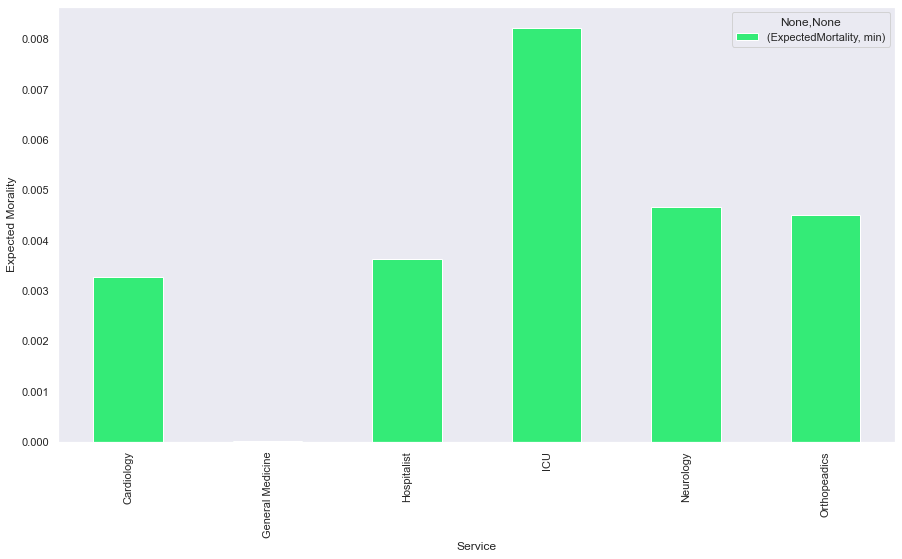

In [12]:
dfreadm.groupby(['Service'])[['ExpectedMortality']].agg(['min']).plot(kind='bar',ylabel='Expected Morality',grid = False, color ='#34eb77')

# 34. np.arange(1,31).reshape(6,5) Find the array slicing to get the elements with values 11,12,16,17

In [36]:
arr=np.arange(1,31).reshape(6,5)
slice=arr[2:4,:2]
print(slice)

[[11 12]
 [16 17]]


# 35. np.arange(1,31).reshape(6,5), find array slicing for elements 2,8,14,20

In [9]:
sample = np.arange(1,31).reshape(6,5)
#slicing for 2
sample[0,1]

2

In [10]:
#slicing for 8
sample[1,2]

8

In [11]:
#slicing for 14
sample[2,3]

14

In [12]:
#slicing for 20
sample[3,-1]

20

# 36. Create a correlation matrix on EDVisits

In [13]:
corrMatrix = dfedv.corr()
print (corrMatrix)

           EDVisitID  PatientID    Acuity
EDVisitID   1.000000   0.975477  0.005813
PatientID   0.975477   1.000000  0.003545
Acuity      0.005813   0.003545  1.000000


# 37. Write a function to print all the upper case letter of a given sentence

In [14]:
def print_uppercase_letters(sentence) :
    for c in sentence :
        if c.isupper():
            print(c)
    
message = input("Type a sentence: ")
print_uppercase_letters(message)

Type a sentence: Python Hackathon Evaluation in Progress
P
H
E
P


# 38. Number of patients on 'Transfer' based on primary diagnosis

In [20]:
dfreadm_prdg = (dfreadm[(dfreadm['DischargeDisposition']=='Transfer')]).groupby(["PrimaryDiagnosis"])[["AdmissionID"]].count()
dfreadm_prdg

,AdmissionID
PrimaryDiagnosis,
Afib,1
Diabetes,7
Flu,2
Heart Failure,9
Knee Replacement,1
Laceration,1
Pain,1
Pneumonia,8
Stroke,9


# 39. Get the FirstName, LastName,DateOfBirth of the Patients whose reason for visit is Migraine. Use EDUnique Sheet for reason for visit

In [10]:
#1. First create the merge 
#2 Then do data filtering on the new df
dfpa_dfreadm = pd.merge(dfpa,dfedu,
    how="inner", on="PatientID",sort=True)

(dfpa_dfreadm[(dfpa_dfreadm['ReasonForVisit']=='Migraine')]).loc[:,['FirstName','LastName','DateOfBirth','ReasonForVisit']].reset_index(drop=True)

,FirstName,LastName,DateOfBirth,ReasonForVisit
0,Far,Myers,1985-11-15 02:08:42.090,Migraine
1,Devlin,Michael,1976-04-15 02:52:09.762,Migraine
2,Zonnya,Ab,1963-05-23 10:04:33.074,Migraine
3,Gan,Yu,1970-06-02 06:22:54.675,Migraine
4,Joesph,Long,1979-12-04 16:45:56.080,Migraine
...,...,...,...,...
111,Barrows,Coupland,1979-10-31 18:28:35.483,Migraine
112,Knox,Group,1975-08-25 22:27:50.177,Migraine
113,Kuvalis,Coupland,1986-05-23 19:23:27.752,Migraine
114,Jerrilyn,Dyson,1978-01-18 02:41:55.178,Migraine


# 40. Plot a graph showing the count of patients for the reason visited the hospital.

<AxesSubplot:title={'center':'Count of Patients per ReasonofVisit'}, xlabel='ReasonForVisit', ylabel='Count of patients'>

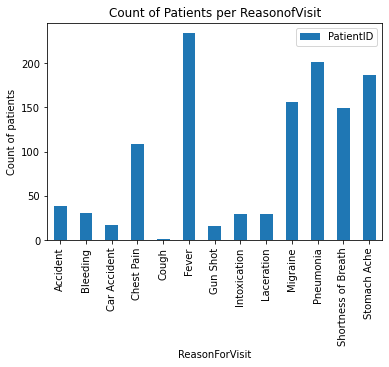

In [11]:
dfedv.groupby(['ReasonForVisit'])[['PatientID']].count().plot(kind='bar',ylabel='Count of patients',title='Count of Patients per ReasonofVisit')

# 41. Find the visit type with maximum 'No Show'

In [12]:
#1. Making a new df for patiens with "no Show" VisitStatus
#2. Grouping them by VisitType and finding max by Idxmax
dfav_NS=dfav[dfav.VisitStatus == 'No Show']
dfav_NS
dfav_NS.groupby(['VisitType'])[['VisitID']].count().idxmax()

VisitID    Telemedicine
dtype: object

# 42. Using loc , get the details of the providers where providerId is between 11 and 20 and ProviderSpecialty is Surgery

In [40]:
dfpr.loc[dfpr['ProviderSpecialty']=='Surgery' ,['ProviderID','ProviderSpecialty']].loc[11:20].reset_index(drop=True)

,ProviderID,ProviderSpecialty
0,12,Surgery
1,13,Surgery
2,14,Surgery
3,15,Surgery
4,16,Surgery


43. Write a regular expression to find all the digits and numbers in the string

In [13]:
import re
dtr = "we live on 6787.56 and 889 street from 5657"
x = re.findall(r'\d+\.\d+|\d+', dtr)
print(x)

['6787.56', '889', '5657']


In [ ]:
44. Create a pivot table displaying average LOS based on Service and Primary Diagnosis

In [14]:
pivot_table = pd.pivot_table(
    data=dfreadm,
    index=['Service','PrimaryDiagnosis'],
    values='ExpectedLOS',
    aggfunc=['mean']
)
pivot_table


mean
                                    ExpectedLOS
Service          PrimaryDiagnosis              
Cardiology       AMI                  12.414202
                 Afib                 13.162920
                 Broken Leg            3.911826
                 Flu                   3.970428
                 Heart Failure        13.014044
                 Kidney Failure        6.580273
General Medicine Broken Leg            3.368132
                 Diabetes              5.665298
                 Fever                 6.803796
                 Flu                   6.141753
                 Hypertension          5.369365
                 Kidney Failure        5.943163
                 Laceration            6.771154
                 Pneumonia             6.140270
                 Stroke                7.173333
Hospitalist      AMI                  13.828290
                 Broken Leg            7.125069
                 Diabetes              7.874359
                 Fever                 8.865651
                 Flu                   7.033979
                 Hypertension          7.864913
                 Kidney Failure        7.850346
                 Knee Replacement      2.255705
                 Laceration            7.069360
                 Pneumonia             8.146240
                 Stroke               15.349671
ICU              AMI                  12.503213
                 Afib                  9.651522
                 Fever                 3.860693
                 Flu                   4.953871
                 Heart Failure        12.784620
                 Hypertension          5.092533
                 Kidney Failure        9.045995
                 Laceration           10.101443
                 Pneumonia            13.523626
                 Spinal Cord Injury   15.276540
                 Stroke               13.297978
Neurology        AMI                  10.482847
                 Flu                   6.700593
                 Heart Failure        12.737565
                 Hypertension          4.276454
                 Migraine             12.202213
                 Pain                 11.441453
                 Pneumonia             7.527330
                 Stroke               12.745608
Orthopeadics     Hip Fracture          3.474971
                 Knee Replacement      3.702839

# 45. Calculate mortality by diagnosis

In [15]:
dfpdmortality = pd.DataFrame()
prdg_list = dfreadm["PrimaryDiagnosis"].unique().tolist()
for i in prdg_list :
    total_prdg_count = dfreadm[(dfreadm['PrimaryDiagnosis']==i)]["AdmissionID"].count()
    expired_prdg_count = dfreadm[(dfreadm['PrimaryDiagnosis']==i) & (dfreadm['DischargeDisposition']=='Expired') ]["AdmissionID"].count()
    dfpdmortality = dfpdmortality.append({'PrimaryDiagnosis' : i, 'PrDgExpiredCount' : expired_prdg_count, 'PrDgTotalCount' : total_prdg_count}, 
                ignore_index = True)
    
dfpdmortality["MortalityRate"] = (dfpdmortality["PrDgExpiredCount"]/dfpdmortality["PrDgTotalCount"]) * 100
dfpdmortality

,PrimaryDiagnosis,PrDgExpiredCount,PrDgTotalCount,MortalityRate
0,Kidney Failure,2.0,20.0,10.000000
1,Flu,11.0,80.0,13.750000
2,Heart Failure,16.0,78.0,20.512821
3,Pneumonia,16.0,177.0,9.039548
4,AMI,6.0,48.0,12.500000
5,Stroke,7.0,68.0,10.294118
6,Hypertension,16.0,50.0,32.000000
7,Knee Replacement,2.0,23.0,8.695652
8,Diabetes,9.0,64.0,14.062500
9,Afib,4.0,11.0,36.363636


# 46. Write a code to split a sentence into words using regex

In [14]:
#To take input from the user
import re
my_string = input("Enter the sentence ")
print('Words in this string are:',(re.split(r'\s',my_string)))


Enter the sentence This is just me
Words in this string are: ['This', 'is', 'just', 'me']


# 47. Using indexing ,loc ,retrieve the row with maximum BloodPressureSystolic

In [15]:
dfav.loc[dfav['BloodPressureSystolic'].idxmax()]

VisitID                                          933
PatientMRN                                       884
ProviderID                                        27
DateofVisit                      2019-02-14 00:00:00
DateScheduled             2019-01-22 19:26:49.163000
VisitDepartmentID                                 12
VisitType                               Telemedicine
BloodPressureSystolic                          190.0
BloodPressureDiastolic                    143.989174
Pulse                                      74.976879
VisitStatus                                Completed
Name: 236, dtype: object

# 48. Display the average LOS based on Service and Discharge Disposition(Maintain the column Hierarchy)

In [16]:
#abs(dataFrame['Date_of_Purchase']-dataFrame['Date_of_Service'])
#dfreadm['LOS']= dfreadm['DischargeDate'] - dfreadm['AdmissionDate']
#df_LOS=pd.DataFrame(dfreadm['LOS'])
#dt.strptime(dfreadm['DischargeDate'], "%Y/%m/%d %H:%M:%S.%f")
#dfreadm.LOS
#df_LOS['LOS'].dt.date

dfreadm['DischargeDate_abs'] = dfreadm['DischargeDate'].dt.date
dfreadm['AdmissionDate_abs'] = dfreadm['AdmissionDate'].dt.date
#dfreadm['DischargeDate_abs']
dfreadm['LOS']= abs(dfreadm['DischargeDate_abs'] - dfreadm['AdmissionDate_abs'])
#dfreadm['LOS_abs'] = dfreadm['LOS'].dt.date
dfreadm.groupby(['Service','DischargeDisposition'])[['LOS']].mean()
#dfreadm['LOS']

LOS
Service          DischargeDisposition                          
Cardiology       Expired                        8 days 20:48:00
                 Home                          10 days 04:28:48
                 Transfer                      11 days 04:48:00
General Medicine Expired                        8 days 12:00:00
                 Home                 9 days 18:33:00.786026200
                 Transfer                      10 days 16:30:00
Hospitalist      Expired                       10 days 00:00:00
                 Home                 9 days 00:49:05.454545454
                 Transfer                       8 days 16:00:00
ICU              Expired              9 days 06:37:14.482758620
                 Home                 9 days 03:03:16.363636363
                 Transfer                       8 days 20:00:00
Neurology        Expired                       10 days 04:26:40
                 Home                           9 days 04:40:00
                 Transfer                      12 days 00:00:00
Orthopeadics     Expired                       11 days 19:12:00
                 Home                 8 days 20:18:27.692307692
                 Transfer                      16 days 00:00:00

In [ ]:
49. Create a jointplot between expected mortality & expected length of stay

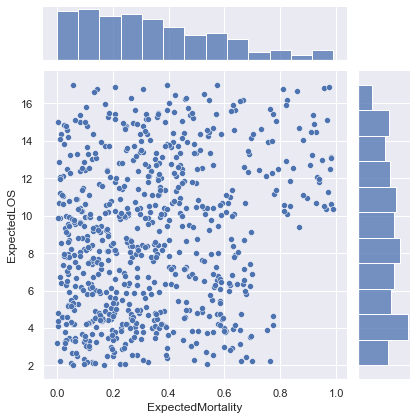

In [16]:
sns.jointplot(x = "ExpectedMortality", y = "ExpectedLOS",
              kind = "scatter", data = dfreadm)

# 50. Which departmentID has maximum number of visits scheduled.

In [17]:
dfav.groupby(['VisitDepartmentID'])[['VisitID']].count().idxmax()

VisitID    11
dtype: int64

# 51. Display patient details where "ReasonForVisit" is either 'Migraine' or 'Pneumonia' and Acuity is 2 or more.

In [28]:
dfedv[(dfedv["ReasonForVisit"].isin(["Migraine", "Pneumonia"])) & (dfedv["Acuity"] >= 2)]

,EDVisitID,PatientID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition
1,12,12,2020-01-01 02:45:40.302,2020-01-02 02:00:00.517,2,Migraine,Admitted
3,14,14,2020-01-01 03:12:19.349,2020-01-01 04:32:29.142,3,Migraine,Admitted
11,29,29,2020-01-01 06:51:28.639,2020-01-02 05:57:01.639,2,Pneumonia,Admitted
12,30,30,2020-01-01 07:25:54.177,2020-01-01 23:30:20.151,3,Pneumonia,Admitted
13,31,31,2020-01-01 07:32:51.917,2020-01-01 19:55:46.991,4,Pneumonia,Admitted
...,...,...,...,...,...,...,...
1107,1027,773,2020-01-13 15:27:07.001,2020-01-14 13:27:31.778,2,Migraine,Discharged
1150,1104,850,2020-01-14 10:46:08.650,2020-01-14 20:52:26.031,2,Migraine,Discharged
1152,1106,852,2020-01-14 11:19:41.401,2020-01-15 02:47:17.353,2,Migraine,Discharged
1160,1122,868,2020-01-14 15:05:58.777,2020-01-15 13:53:02.550,2,Migraine,Discharged


In [ ]:
52. Retrieve the row with minimum DBP using sorting technique

In [17]:
df_dbp = dfav.sort_values(by= 'BloodPressureDiastolic').min()
df_dbp

VisitID                                            1
PatientMRN                                         4
ProviderID                                         1
DateofVisit                      2019-01-01 00:00:00
DateScheduled             2018-12-04 12:16:32.105000
VisitDepartmentID                                  1
VisitType                                  Follow Up
BloodPressureSystolic                          120.0
BloodPressureDiastolic                     51.695653
Pulse                                      50.072068
VisitStatus                                 Canceled
dtype: object

In [ ]:
53. Take the ReasonForVisit from user, find the number of patients admitted with that ReasonForVisit

In [19]:
ls = []

ls = dfedv['ReasonForVisit'].groupby(dfedv['ReasonForVisit']).apply(list)

#To take input from the user
enter_in = input("Enter Reason For Visit ?  ::  ")

if enter_in in ls:
    df_result = (dfedv['PatientID'][(dfedv['ReasonForVisit']== enter_in ) & (dfedv['EDDisposition']== 'Admitted') ].groupby(dfedv['PatientID'])).nunique().count()
    print("Number of Patient with "+enter_in+" Condition is ::   ", df_result)
else:
    print("There is no such condition exists")


There is no such condition exists


In [ ]:
54. Mortality O.E (Observed Vs Expected)

In [20]:
dfreadm_md = (dfreadm["PatientID"][(dfreadm['DischargeDisposition']=='Expired')]).groupby(dfreadm["PatientID"]).nunique().count()

dfreadm_md
dfreadm_md1 = dfreadm['ExpectedMortality'].sum()
dfreadm_md1

print("Mortality O.E (Observed Vs Expected) ::  ",round(dfreadm_md/dfreadm_md1,2))

Mortality O.E (Observed Vs Expected) ::   0.43


# 55. Create a bar chart on service & expected length of stay

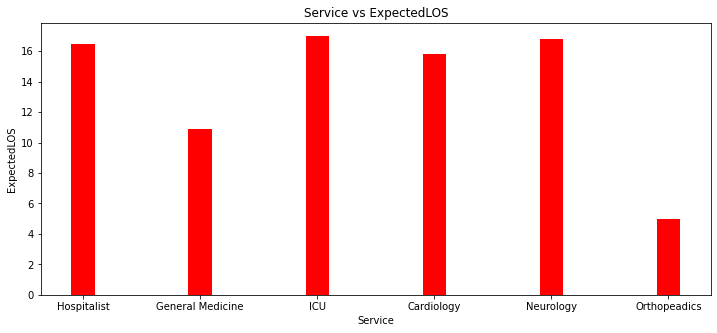

In [15]:
#Create a bar chart on service & expected length of stay
fig = plt.figure(figsize = (12, 5))
plt.bar(dfreadm["Service"], dfreadm["ExpectedLOS"], color ='red',
        width = 0.2)
plt.xlabel("Service")
plt.ylabel("ExpectedLOS")
plt.title("Service vs ExpectedLOS")
plt.show()

In [ ]:
56. Count of canceled status

In [21]:
df_vs = dfav['PatientMRN'][dfav['VisitStatus']=='Canceled' ].groupby(dfav['PatientMRN']).nunique().count()
df_vs



49

# 57. Find the age prone to get stroke

In [33]:
dfpa_dfreadm = pd.merge(
    dfreadm,
    dfpa,
    how="inner",
    on="PatientID",
     sort=True
    )
dfpa_dfreadm[(dfpa_dfreadm["PrimaryDiagnosis"] == "Stroke")].groupby( ["Age"])["AdmissionID"].count().idxmax()


57.0

# 58. Display total count of patients service wise based on gender

In [34]:
df=dfreadm.merge(dfpa,how='inner',on='PatientID')
df.groupby(['Service','Gender'])[['PatientID']].count()

PatientID
Service          Gender           
Cardiology       Female         41
                 Male           54
General Medicine Female        114
                 Male          149
Hospitalist      Female         35
                 Male           66
ICU              Female         65
                 Male           86
Neurology        Female         34
                 Male           31
Orthopeadics     Female         22
                 Male           23

In [ ]:
59. Create a dataframe by splitting provider name to firstname and lastname with names for the columns

In [22]:
dfpr_new = pd.DataFrame()
dfpr_new[['First Name', 'Second Name']] = dfpr['ProviderName'].str.split(' ', expand=True)
dfpr_new

,First Name,Second Name
0,Sally,Sue
1,Mike,Myers
2,Jordan,Michael
3,Ted,Texas
4,Ala,Bama
5,Harry,Kane
6,Barry,Bar
7,Ted,Green
8,Ted,Black
9,Fred,Man


# 60. Predict the output of the program..

In [39]:
class Acc: 
    def __init__(self, id): 
        self.id = id
        id = 555 

acc = Acc(111) 
print(acc.id)

111


# 61. Show a graph by multiplotting on the same canvas .(Subplots)

In [ ]:
62. Display the data for all 'White Female' patients above the age of 50

In [23]:
now = pd.Timestamp('now')
dfpa['age'] = (now - dfpa['DateOfBirth']).astype('<m8[Y]')

df_wsm = dfpa[(dfpa['Race']=='White') & (dfpa['age'] > 50)  & (dfpa['Gender']=='Female') ].groupby(['Race','Gender'])['PatientID'].count()
df_wsm


Race   Gender
White  Female    108
Name: PatientID, dtype: int64

# 63. Using loc, retrieve the firstname and lastname of patients between indices 101 and 200

In [16]:
dfpa_name = dfpa.loc[101 : 200]
dfpa_name[['FirstName','LastName']]

,FirstName,LastName
101,Gipsy,Frankton
102,Jethro,Wharin
103,Viv,Aylward
104,Swift,Dreschler
105,Fadel,Jacquemard
...,...,...
196,Noam,Laguerre
197,Arie,Bayless
198,Janaye,O'Mohun
199,Fonz,Group


In [ ]:
64. Using numpy functions, multiply the following arrays
a=np.arange(6).reshape(2,3)
b=np.arange(6).reshape(3,2)

In [24]:
a=np.arange(6).reshape(2,3) 
b=np.arange(6).reshape(3,2)
np.matmul(a, b)


array([[10, 13],
       [28, 40]])

# 65. Get the count of number of patients based on service and primary diagnosis

In [18]:
dfreadm.groupby(['Service','PrimaryDiagnosis'])[['AdmissionID']].count()

AdmissionID
Service          PrimaryDiagnosis               
Cardiology       AMI                          40
                 Afib                         10
                 Broken Leg                    3
                 Flu                           2
                 Heart Failure                39
                 Kidney Failure                1
General Medicine Broken Leg                    3
                 Diabetes                     38
                 Fever                        13
                 Flu                          54
                 Hypertension                 35
                 Kidney Failure               12
                 Laceration                   21
                 Pneumonia                    67
                 Stroke                       20
Hospitalist      AMI                           1
                 Broken Leg                    3
                 Diabetes                     26
                 Fever                         3
                 Flu                          19
                 Hypertension                  6
                 Kidney Failure                6
                 Knee Replacement              1
                 Laceration                    7
                 Pneumonia                    28
                 Stroke                        1
ICU              AMI                           5
                 Afib                          1
                 Fever                         3
                 Flu                           3
                 Heart Failure                33
                 Hypertension                  4
                 Kidney Failure                1
                 Laceration                    1
                 Pneumonia                    77
                 Spinal Cord Injury            2
                 Stroke                       21
Neurology        AMI                           2
                 Flu                           2
                 Heart Failure                 6
                 Hypertension                  5
                 Migraine                     12
                 Pain                          7
                 Pneumonia                     5
                 Stroke                       26
Orthopeadics     Hip Fracture                 23
                 Knee Replacement             22

# 66. np.arange(1,31).reshape(6,5), find array slicing to get the elements 4,5,24,25,29,30

In [36]:
sample = np.arange(1,31).reshape(6,5)
sample

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25],
       [26, 27, 28, 29, 30]])

In [37]:
#slicing for 4
sample[0,3]

4

In [38]:
#slicing for 5
sample[0,-1]

5

In [39]:
#slicing for 24
sample[4,3]

24

In [41]:
#slicing for 25
sample[4,-1]

25

In [42]:
#slicing for 29
sample[-1,3]

29

In [43]:
#slicing for 30
sample[-1,-1]

30

In [ ]:
67. Make a pivot table by counts the no. of patients from the admission date till discharge date

# 68. Display the data where actual LOS is greater than expected LOS

In [25]:
df_date = dfreadm
df_date['diff_days'] = df_date['DischargeDate'] - df_date['AdmissionDate']
df_date['diff_days']=df_date['diff_days']/np.timedelta64(1,'D')
 

df_date.loc[df_date['diff_days'] > df_date['ExpectedLOS']]


,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag,diff_days
1,635,2,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0,3.895045
2,606,3,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0,3.936385
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0,4.241029
10,568,12,2018-01-01,2018-01-09 09:21:47.300,Home,Hospitalist,Pneumonia,7.162811,0.671473,1.0,5.0,1.0,8.390131
11,107,13,2018-01-01,2018-01-09 21:34:42.467,Home,Hospitalist,Flu,4.554479,0.266584,1.0,5.0,1.0,8.899103
...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,521,738,2018-02-22,2018-03-07 21:22:10.061,Home,Cardiology,AMI,13.725405,0.388319,NaN,NaN,NaN,13.890394
716,548,739,2018-02-22,2018-03-08 02:43:18.749,Home,ICU,Pneumonia,11.355456,0.088518,NaN,NaN,NaN,14.113411
717,509,740,2018-02-22,2018-03-08 09:27:18.377,Home,Hospitalist,Pneumonia,4.819882,0.503308,NaN,NaN,NaN,14.393963
718,605,741,2018-02-22,2018-03-10 06:06:12.068,Home,General Medicine,Flu,3.123064,0.655870,NaN,NaN,NaN,16.254306


# 69. Details of the patients whose firstname or lastname contains string "lau" , should be case insensitive

In [24]:
name=dfpa['FullName']
print(name[name.str.contains('lau',case=False,regex=True)])

282       Lauren Gaskal
322        Lauren Foort
369    Zulauf Ellingham
382          Zulauf LLC
454        Zulauf Alvar
463       Zulauf Manske
818     Zulauf Bitcheno
830    Zulauf O'Shavlan
850       Lemmy Klausen
906    Jerrilyn Klausen
910       Zulauf Orbine
Name: FullName, dtype: object


# 70. Plot a graph to show the distribution of expected mortality

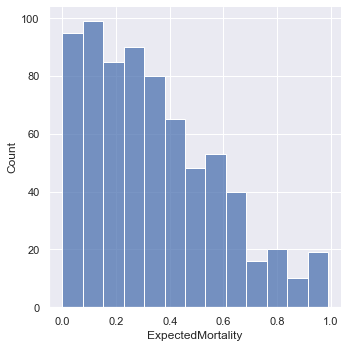

In [46]:
sns.displot(dfreadm['ExpectedMortality'],kde=False)

# 71. Create a visualization on the count the no. of patients based on primary diagnosis

<AxesSubplot:title={'center':'Count Of Patient ID on Primary Diagnosis'}, xlabel='Primary Diagnosis', ylabel='Patient Count'>

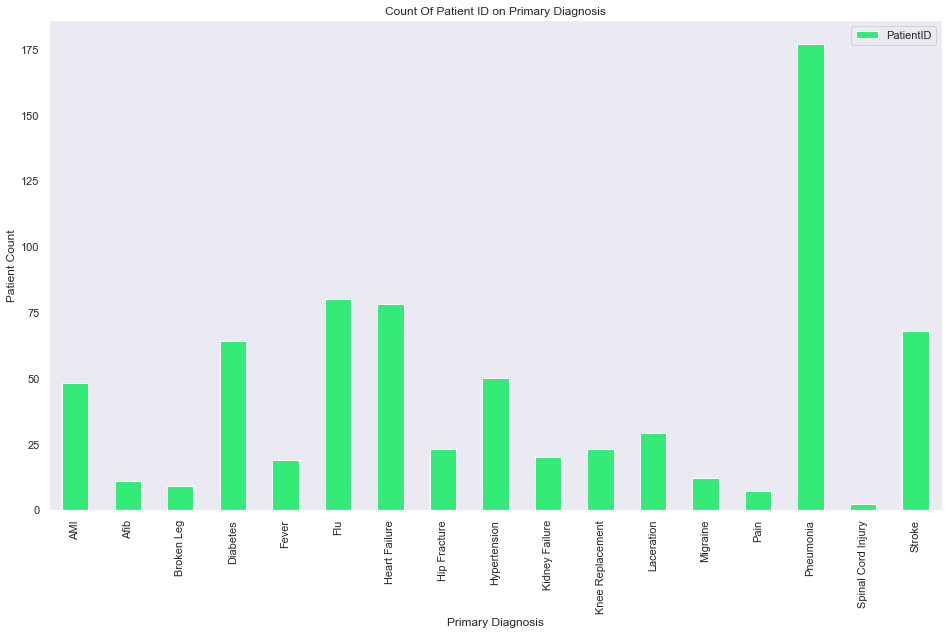

In [26]:
df = dfreadm.groupby(['PrimaryDiagnosis'])[['PatientID']].count()

df.plot(kind='bar', title='Count Of Patient ID on Primary Diagnosis', ylabel='Patient Count',
         xlabel='Primary Diagnosis', figsize=(16, 9),grid = False, color ='#34eb77')



# 72. List male patients over the age of 60 who have undergone surgery from January-March 2019

In [25]:
dfav["DateofVisitMonth"] = pd.DatetimeIndex(dfav["DateofVisit"]).month
dfav["DateofVisitYear"] = pd.DatetimeIndex(dfav["DateofVisit"]).year
dfpr_surgery = (dfpr[(dfpr['ProviderSpecialty']=='Surgery')])
dfpa_60male = (dfpa[(dfpa['Age']==60) & (dfpa['Gender']=='Male')])
dfav_JantoMar2019 = (dfav[(dfav['DateofVisitYear']==2019) & (dfav['DateofVisitMonth'].isin([1,2,3]))])

dfav_dfpr = pd.merge(
    dfav_JantoMar2019,
    dfpr_surgery,
    how="inner",
    on="ProviderID",
     sort=True
    )

dfav_dfpr_dfpa = pd.merge(
    dfav_dfpr,
    dfpa_60male,
    how="inner",
    left_on="PatientMRN",
    right_on="PatientID",
     sort=True
    )

print(dfav_dfpr_dfpa[["PatientID", "FirstName", "LastName", "Age","Gender", "DateofVisitYear", "DateofVisitMonth" ]])

   PatientID FirstName LastName   Age Gender  DateofVisitYear  \
0         15   Gabriel    Saint  60.0   Male             2019   

   DateofVisitMonth  
0                 1  


# 73. Delete the column 'DischargeDispostion' iteratively

In [45]:

#temporarily creating a new dataframe, to avoid getting other queries wrong after deletion..
dfreadm1 = dfreadm
columnlist = dfreadm1.columns.tolist()
for i in columnlist :
    if i == "DischargeDisposition" :
        dfreadm1.pop(i)

dfreadm1

,AdmissionID,PatientID,AdmissionDate,DischargeDate,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Hospitalist,Kidney Failure,6.717771,0.010046,0.0,NaN,NaN
1,635,2,2018-01-01,2018-01-04 21:28:51.898,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0
2,606,3,2018-01-01,2018-01-04 22:28:23.672,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0
3,587,5,2018-01-01,2018-01-05 05:47:04.933,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0
4,640,6,2018-01-01,2018-01-05 14:18:30.029,ICU,Heart Failure,13.650953,0.408898,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
715,521,738,2018-02-22,2018-03-07 21:22:10.061,Cardiology,AMI,13.725405,0.388319,0.0,NaN,NaN
716,548,739,2018-02-22,2018-03-08 02:43:18.749,ICU,Pneumonia,11.355456,0.088518,0.0,NaN,NaN
717,509,740,2018-02-22,2018-03-08 09:27:18.377,Hospitalist,Pneumonia,4.819882,0.503308,0.0,NaN,NaN
718,605,741,2018-02-22,2018-03-10 06:06:12.068,General Medicine,Flu,3.123064,0.655870,0.0,NaN,NaN


# 74. Get the list of ReasonForVisit

In [17]:
dfedv.ReasonForVisit.unique()

array(['Stomach Ache', 'Migraine', 'Chest Pain', 'Bleeding',
       'Car Accident', 'Pneumonia', 'Fever', 'Shortness of Breath',
       'Gun Shot', 'Accident', 'Laceration', 'Intoxication', 'Cough'],
      dtype=object)

# 75. Calculate the time spent in ED Department for each visit

In [33]:
dfedv['VisitDate'] = pd.to_datetime(dfedv['VisitDate'])
dfedv['EDDischargeTime'] = pd.to_datetime(dfedv['EDDischargeTime'])
Time = (dfedv['EDDischargeTime'] - dfedv['VisitDate'])
Time

0      0 days 11:20:22.924000
1      0 days 23:14:20.215000
2      0 days 01:50:56.151000
3      0 days 01:20:09.793000
4      0 days 02:38:20.043000
                ...          
1194   0 days 15:53:09.453000
1195   0 days 22:27:04.030000
1196   0 days 04:30:03.545000
1197   0 days 06:10:35.054000
1198   0 days 10:49:26.581000
Length: 1199, dtype: timedelta64[ns]

# 76. Reverse the string without using inbuilt functions

In [20]:
my_string=("Python")
str=""
for i in my_string:
    str=i+str
print('Original string:',my_string)
print("Reversed string:",str)

Original string: Python
Reversed string: nohtyP


# 77. Create a bar chart by making sets on Acuity & EDDischarge column & make the hatchs onto the bar by using set_hatch() method

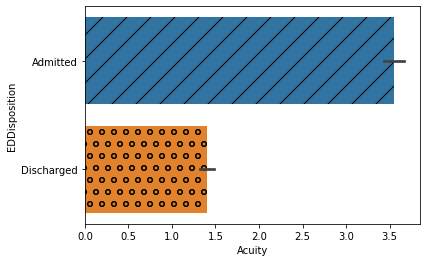

In [46]:

x1=dfedv["Acuity"]
y1=dfedv["EDDisposition"]

# Make the barplot
bar = sns.barplot(x=x1, y=y1);

# Define some hatches
hatches = ['/','o','*']

# Loop over the bars
for i,thisbar in enumerate(bar.patches):
    # Set a different hatch for each bar
    thisbar.set_hatch(hatches[i])
plt.show()

# 78. Find reasonForVisit with highest count of acuity 5 patients

In [29]:
dfedv_acuity5 = dfedv[(dfedv["Acuity"] == 5)]
dfedv_acuity5.groupby(["ReasonForVisit"])["EDVisitID"].count().idxmax()

'Chest Pain'

# 79. Which PrimaryDiagnosis has the biggest difference between maximum and minimum Expected LOS?

In [32]:
a=dfreadm.groupby('PrimaryDiagnosis')['ExpectedLOS'].agg(np.ptp)
print('Maximum ExpectedLOS :',a.idxmax(),'-' ,a.max())
print('Minimum ExpectedLOS :',a.idxmin(),'-',a.min())

Maximum ExpectedLOS : Pneumonia - 14.834260065410472
Minimum ExpectedLOS : Spinal Cord Injury - 0.1855799915609957


In [ ]:
80. Write a code snippet to print different ProviderSpecialty ( use groupby and get the list of the groups)

In [27]:
df_pr = dfpr.groupby(['ProviderSpecialty'])
for name,group in df_pr :
    print(name)
    print(group)

Cardiology
    ProviderID   ProviderName ProviderSpecialty     ProviderDateOnStaff
16          17   Kent Kendall        Cardiology 2001-12-22 11:18:32.919
17          18     Ryan Kevin        Cardiology 2003-01-14 21:16:34.778
18          19   Tyler Conner        Cardiology 2003-07-09 02:41:40.410
19          20  Bailey Barret        Cardiology 2003-08-20 16:05:50.179
20          21    Megan Bonco        Cardiology 2004-02-17 21:22:30.546
21          22  Joesph Walter        Cardiology 2005-02-04 11:40:44.121
22          23    Walter King        Cardiology 2006-03-12 22:11:58.070
23          24      Luke Long        Cardiology 2006-04-28 00:16:36.762
Pediatrics
   ProviderID    ProviderName ProviderSpecialty     ProviderDateOnStaff
0           1       Sally Sue        Pediatrics 1993-01-01 00:00:00.000
1           2      Mike Myers        Pediatrics 1993-05-02 00:00:17.695
2           3  Jordan Michael        Pediatrics 1993-06-24 21:31:46.687
3           4       Ted Texas        Pedia

# 81. Display full name of patients

In [19]:
dfpa['FullName']=dfpa['FirstName']+' '+dfpa['LastName']
dfpa['FullName']

0             Lanni Sue
1             Far Myers
2       Devlin  Michael
3         Carmine Texas
4            Tann  Bama
             ...       
940         Wat Fideler
941     Wandie Baythrop
942     Diahann Smeeton
943    Panchito Sharple
944        Walsh Calvie
Name: FullName, Length: 945, dtype: object

# 82. Retrieve the rows where SBP<140 and DBP<80

In [18]:
filter1=dfav['BloodPressureSystolic']<140
filter2=dfav['BloodPressureDiastolic']<80
dfav.loc[filter1 & filter2].reset_index(drop=True)

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
0,809,894,31,2019-03-13,2019-02-28 10:28:01.091,2,Physical,121.0,57.692485,60.402573,No Show
1,707,859,36,2019-03-16,2019-02-26 17:42:39.779,6,Follow Up,137.0,72.756586,64.071361,No Show
2,503,887,12,2019-01-21,2019-01-07 06:04:17.575,7,Follow Up,131.0,74.163851,97.248671,No Show
3,710,862,1,2019-03-19,2019-03-03 11:39:03.145,9,Telemedicine,127.0,66.406797,94.537837,No Show
4,711,863,1,2019-03-20,2019-03-10 07:34:56.766,10,Telemedicine,124.0,77.303553,77.926874,No Show
...,...,...,...,...,...,...,...,...,...,...,...
98,177,815,32,2019-02-22,2019-02-04 06:53:41.987,9,Follow Up,122.0,67.615828,52.742629,Canceled
99,786,871,34,2019-03-25,2019-02-26 09:48:42.832,3,Telemedicine,122.0,78.210501,53.760978,Canceled
100,394,623,6,2019-02-05,2019-01-10 05:43:34.544,9,Physical,130.0,75.114100,80.951071,Canceled
101,399,638,11,2019-02-10,2019-02-02 20:49:56.868,2,Physical,121.0,64.896818,68.496869,Canceled


# 83. Create the plot below by adding two axes to a figure object at [0.1,0.1,0.9,0.9] & [0.2,0.6,0.3,0.3]

Text(0, 0.5, 'y')

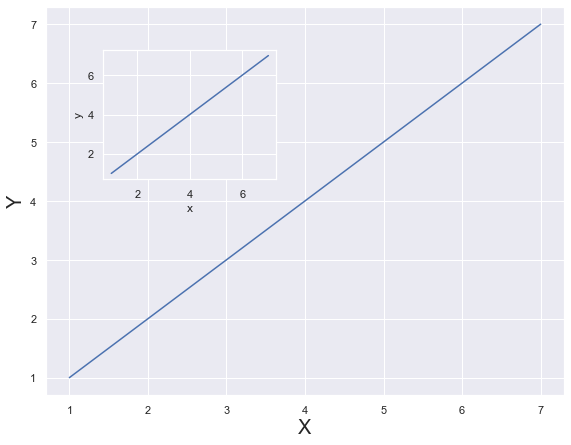

In [48]:
x=np.arange(1,10,6)
y=np.arange(1,10,6)

figure=plt.figure()
figure_main=figure.add_axes([0.1,0.1,0.9,0.9])
figure_inset=figure.add_axes([0.2,0.6,0.3,0.3])
figure_main.plot(x,y)
figure_inset.plot(y,x)
figure_main.set_xlabel('X',fontsize=20)
figure_main.set_ylabel('Y',fontsize=20)
figure_inset.set_xlabel('x',fontsize=12)
figure_inset.set_ylabel('y',fontsize=12)

# 84. Find the list of patients whose ExpectedLOS is greater than the value given by the user

In [30]:
user_expectedLOS = input("Please enter a Expected Length of Stay: ")
dfdis[(dfdis["ExpectedLOS"] > int(user_expectedLOS) )]

Please enter a Expected Length of Stay: 2


,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality
0,1,9,2018-01-01,2018-01-07 18:06:06.408,Expired,Cardiology,AMI,9.646857,0.061540
1,257,93,2018-01-06,2018-01-18 02:59:04.667,Expired,Cardiology,Broken Leg,6.816558,0.628827
2,152,101,2018-01-07,2018-01-11 16:16:06.782,Expired,Cardiology,Kidney Failure,6.580273,0.573887
3,361,102,2018-01-07,2018-01-15 04:48:33.134,Expired,Cardiology,Afib,12.794536,0.222163
4,258,103,2018-01-07,2018-01-15 13:32:36.157,Expired,Cardiology,Broken Leg,2.639297,0.055468
...,...,...,...,...,...,...,...,...,...
715,715,716,2018-02-21,2018-03-06 03:31:05.262,Transfer,ICU,Heart Failure,11.362095,0.370695
716,698,723,2018-02-22,2018-02-26 15:09:02.584,Transfer,ICU,Heart Failure,10.262312,0.812930
717,704,724,2018-02-22,2018-02-27 07:59:32.385,Transfer,General Medicine,Pneumonia,6.036234,0.094128
718,716,733,2018-02-22,2018-03-05 12:31:55.958,Transfer,ICU,Heart Failure,13.323413,0.490892


# 85. Find count of Black/African American, English Females

In [27]:
dfpa[ (dfpa['Race']=='Black/African-American') & (dfpa['Language']=='English')  & (dfpa['Gender']=='Female') ]

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age,AgeQuartile
120,121,Granny,Prandoni,1984-12-26 04:09:28.604,Female,Black/African-American,English,37.0,Q1
121,122,Hilll,Nock,1966-03-28 19:01:51.451,Female,Black/African-American,English,56.0,Q4
122,123,Pollyanna,Mochan,1973-05-06 06:39:21.883,Female,Black/African-American,English,49.0,Q3
123,124,Lucila,McGrann,1972-03-06 15:34:40.549,Female,Black/African-American,English,50.0,Q3
124,125,Mia,Inc,1971-03-21 15:38:42.818,Female,Black/African-American,English,51.0,Q3
...,...,...,...,...,...,...,...,...,...
914,915,Jerrilyn,Dyson,1978-01-18 02:41:55.178,Female,Black/African-American,English,44.0,Q2
915,916,Kaylil,Baldack,1966-11-17 14:10:35.224,Female,Black/African-American,English,55.0,Q3
916,917,Velvet,Bushnell,1965-11-13 07:26:58.889,Female,Black/African-American,English,56.0,Q4
917,918,Kiri,Allom,1960-09-05 13:21:10.008,Female,Black/African-American,English,61.0,Q4
